# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 17, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    member 1
    
    member 2
    
    ...

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [1]:
# general
import sys
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from datetime import datetime
from time import time

# scikit learn datasets
from sklearn.datasets import load_files

# scikit feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# preprocessing, cross validation and model analysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

# scikit learn classifiers
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# used to pickle results
from sklearn.externals import joblib

# matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [10]:
# load data and print number of samples
movie_reviews_data_folder = "txt_sentoken"
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [11]:
# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

In [12]:
# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
text_clf_1 = Pipeline([('tfidf_vect', TfidfVectorizer(min_df=3, max_df=0.95)),
                        ('svm', LinearSVC(C=1000))
                      ])

In [21]:
# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters_1 = {'tfidf_vect__ngram_range': [(1, 1),(2,2)]}

grid_search = GridSearchCV(text_clf_1, parameters_1, n_jobs=1).fit(docs_train, y_train)

In [22]:
# TASK: print the cross-validated scores for the each parameters set
# explored by the grid search
# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, grid_search.best_params_[param_name]))

In [23]:
# TASK: print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.

# NOTE: This code did not appear in the skeleton file and
# replaced the block above in the solution.
n_candidates = len(grid_search.cv_results_['params'])

for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

0 params - {'tfidf_vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.01
1 params - {'tfidf_vect__ngram_range': (2, 2)}; mean - 0.82; std - 0.02


In [24]:
# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

In [25]:
# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

             precision    recall  f1-score   support

        neg       0.85      0.86      0.85       250
        pos       0.86      0.85      0.85       250

avg / total       0.85      0.85      0.85       500

[[214  36]
 [ 37 213]]


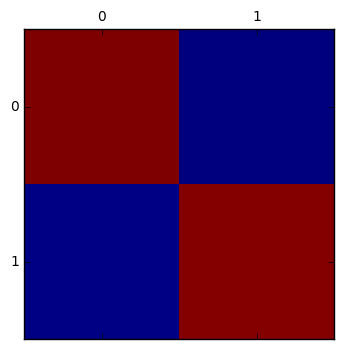

In [26]:
# plot confusion matrix
plt.matshow(cm)
plt.show()

## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [27]:
# Note: original data and train/test files used from problem 1
# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent

# build pipeline using TfidfVectorizer
text_clf_2 = Pipeline([('tfidf_vect', TfidfVectorizer()),
                      ('svm', LinearSVC(C=1000))
                      ])

In [32]:
# specificy pipeline parameters

# ranges for min_df and max_df
min_df_range = np.arange(0.1,0.4,0.1)
max_df_range = 1. - min_df_range
sys.exit()
# min_df_range = [3]
# max_df_range = [0.95]

n_grams_list = [ 
                 [(1,3)]
               ]

keys = ['params','mean_test_score','std_test_score']

for n_grams in n_grams_list:

    print(min_df_range)
    print(max_df_range)
    print(n_grams)
    
    parameters_2 = {
                    'tfidf_vect__min_df': min_df_range,
                    'tfidf_vect__max_df': max_df_range,
                    'tfidf_vect__ngram_range': n_grams
                   }

    start_time = time()
    # Fit the pipeline on the training set using grid search for the parameters
    grid_search_2 = GridSearchCV(text_clf_2, parameters_2, n_jobs=1).fit(docs_train, y_train)
    print("Elapsed time: %s" % ( (time() - start_time)/60.) )

#     # write results to pickle file
#     model_results = { key:grid_search_2.cv_results_[key] for key in keys }
#     filename = "model_results_" + str(n_grams) + "_" + datetime.now().strftime("%Y%m%d-%H%M%S") + '.pkl'
#     joblib.dump(model_results, filename)


SystemExit: 

C:\Users\mniu\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [25]:
# fit tfidf vectorizer with training data
vectorizer = TfidfVectorizer(min_df=3, max_df=0.95).fit(docs_train)

In [26]:
# create training and test sets
Xtrain = vectorizer.transform(docs_train)
Xtest  = vectorizer.transform(docs_test)

In [41]:
print(type(Xtrain))
print(Xtrain.shape)
print(Xtest.shape)


  (0, 15980)	0.0208379616673
  (0, 15974)	0.0240519211797
  (0, 15961)	0.0586171002894
  (0, 15908)	0.0275967885143
  (0, 15876)	0.0143101091653
  (0, 15858)	0.0263940452896
  (0, 15852)	0.0359224527178
  (0, 15801)	0.0212182276397
  (0, 15747)	0.0365120926993
  (0, 15738)	0.040216522777
  (0, 15703)	0.0249799384613
  (0, 15689)	0.0102964226827
  (0, 15664)	0.0159245168813
  (0, 15663)	0.0257667717755
  (0, 15655)	0.0159117299671
  (0, 15653)	0.0121098569436
  (0, 15646)	0.0248020170642
  (0, 15627)	0.0184426219894
  (0, 15564)	0.0146487297651
  (0, 15542)	0.0231152725217
  (0, 15529)	0.0336137011619
  (0, 15523)	0.0353120174936
  (0, 15512)	0.054920747855
  (0, 15491)	0.0248770902976
  (0, 15489)	0.0337028360028
  :	:
  (0, 1006)	0.0635483552084
  (0, 948)	0.054920747855
  (0, 843)	0.040882867948
  (0, 817)	0.0374072660804
  (0, 796)	0.0569594428416
  (0, 762)	0.0217835367181
  (0, 757)	0.03164543837
  (0, 684)	0.0971759656186
  (0, 681)	0.0632922078873
  (0, 678)	0.0930985756454
  (0

In [13]:
# create pipeline for classifiers
clf_pipeline = Pipeline([('svm', LinearSVC()),
                         ('knn', KNeighborsClassifier())
                        ])

# pipeline parameters
clf_parameters = {'svm__C': [500,1000],
                  'knn__n_neighbors' : [3,5]}

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [137]:
# load data and print number of samples
movie_reviews_data_folder = "/home/matt/Documents/wpi/courses/f16/ds501/case_studies/casestudy3/txt_sentoken"
unlabeled_dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(unlabeled_dataset.data))

n_samples: 2000


In [138]:
# Get data
unlabeled_data = unlabeled_dataset.data
labels = unlabeled_dataset.target

In [139]:
# vectorize data
ngram_range = (2,2)
vectorizer = TfidfVectorizer(min_df=3, max_df=0.95,ngram_range=ngram_range)
unlabeled_data_v = vectorizer.fit_transform(unlabeled_data)
print("n_samples: %d, n_features: %d" % unlabeled_data_v.shape)

n_samples: 2000, n_features: 62883


In [140]:
# k-means clustering
n_clusters=2
k_means = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=10)
k_means.fit(unlabeled_data_v)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [141]:
print(unlabeled_data_v.shape)
print(k_means.labels_.shape)

(2000, 62883)
(2000,)


In [142]:
# score k-means clustering
n_correct = 0

for true,pred in zip(labels,k_means.labels_):
    if np.equal(true,pred):
        n_correct = n_correct + 1
        
score = n_correct / len(labels)
print("Accuracy: %0.2f%%" % (100*score))

Accuracy: 53.50%


In [143]:
# reduce dimensions with truncated SVD
# unlabeled_data_v_s = StandardScaler(with_mean=False).fit_transform(unlabeled_data_v)
svd = TruncatedSVD(n_components=2)
unlabeled_data_v_svd = svd.fit_transform(unlabeled_data_v)

In [145]:
# k_means_svd = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=10)
k_means.fit_transform(unlabeled_data_v_svd)

array([[ 0.04567949,  0.10706494],
       [ 0.07277839,  0.11225682],
       [ 0.0559709 ,  0.03449448],
       ..., 
       [ 0.11290067,  0.04795451],
       [ 0.12866079,  0.07077474],
       [ 0.10515165,  0.0653171 ]])

In [146]:
print(unlabeled_data_v_svd)
print()
print(np.sort(k_means.cluster_centers_, axis=0))

[[ 0.18134133  0.07267173]
 [ 0.07449182  0.06214189]
 [ 0.16952863 -0.00561466]
 ..., 
 [ 0.17216517 -0.06484847]
 [ 0.19615191 -0.07335124]
 [ 0.20645862 -0.0406652 ]]

[[ 0.14256081 -0.02712292]
 [ 0.14516821  0.04477691]]


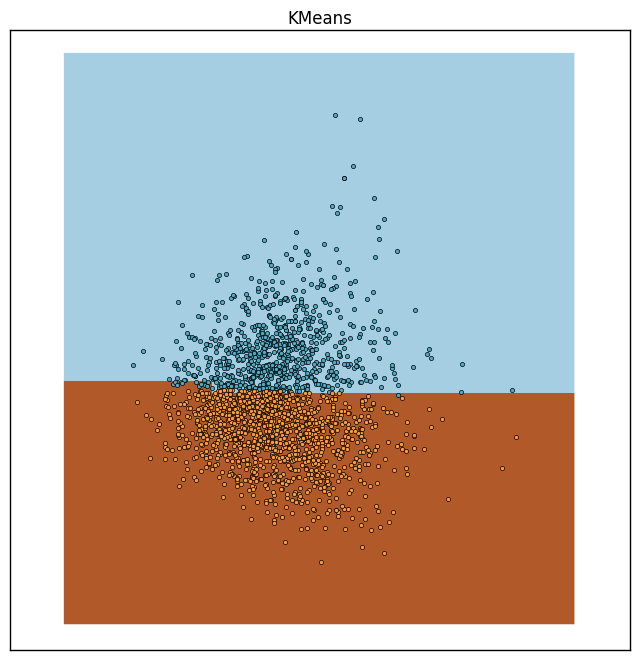

In [148]:
fig = plt.figure(figsize=(8, 8))
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(unlabeled_data_v_svd, k_means_cluster_centers)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01    # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = unlabeled_data_v_svd[:, 0].min() - 0.05, unlabeled_data_v_svd[:, 0].max() + 0.05
y_min, y_max = unlabeled_data_v_svd[:, 1].min() - 0.05, unlabeled_data_v_svd[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
_
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# # KMeans
for k, col in zip(range(2), colors):
    
    my_members = k_means.labels_ == k
    
    cluster_center = k_means_cluster_centers[k]
    
    plt.plot(unlabeled_data_v_svd[my_members, 0], unlabeled_data_v_svd[my_members, 1], 'k.',
            markerfacecolor=col, marker='.')
        
#     plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
#             markeredgecolor='k', markersize=10)
    
plt.title('KMeans')
plt.xticks(())
plt.yticks(())

plt.show()

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 3-TEAM NUMBER ???".